In [235]:
import pandas as pd
import re
import emoji

In [236]:
f = open('chat.txt','r',encoding='utf-8')

In [237]:
data = f.read()
data

"[23/11/20, 9:24:37\u202fPM] ACE-4-CSM: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n[23/11/20, 9:24:37\u202fPM] \u202a+91\xa088013\xa069319\u202c: \u200e\u202a+91\xa088013\xa069319\u202c created this group\n[23/11/20, 9:24:37\u202fPM] ACE-4-CSM: \u200eYou were added\n[30/11/23, 11:09:13\u202fPM] ~\u202fkavitha soppari: Accenture physical mock interviews update:\n\nWe successfully completed the Accenture Virtual mock interviews for all the 310 students on Mon, Tue & Wed.\n\nAlso, TPC is planning a physical mock interview by the industry experts on 1st Dec(Friday) & 2nd Dec (Saturday).\n\nThe Accenture shortlisted will have both Technical & HR interviews\n\nBatch 1: Friday - Civil, EEE, Mech, ECE & CSE shortlisted students - 161 students\n\nBatch 2: Saturday - IT, AI&ML, DS & IoT students - 141 students \n\nAll these students are instructed to report to TPC by 9.30 AM sharp along with\n\n1. An updated res

In [238]:
pattern = re.compile(r'\[(\d{2}/\d{2}/\d{2},\s\d{2}:\d{2}:\d{2}\s[APMapm]+)\]\s~[\u200E\u202F]*(.+)')

# Lists to store extracted data
timestamps = []
messages = []

# Iterate over each line in the data
for line in data.split('\n'):
    # Match the pattern in each line
    match = pattern.match(line)
    
    # If a match is found, extract timestamp and message
    if match:
        timestamp, message = match.groups()
        timestamps.append(timestamp)
        messages.append(message)

timestamps = [timestamp.replace('\u202f', '') for timestamp in timestamps]
date_components, time_components = zip(*(timestamp.split(', ') for timestamp in timestamps))

# Print the separated date and time components
print("Dates:", date_components)
print("Times:", time_components)

Dates: ('30/11/23', '30/11/23', '05/12/23', '05/12/23', '05/12/23', '05/12/23', '05/12/23', '05/12/23', '11/12/23', '12/12/23', '13/12/23', '15/12/23', '16/12/23', '22/12/23', '23/12/23', '27/12/23', '11/01/24', '12/01/24', '17/01/24', '17/01/24', '18/01/24', '19/01/24', '20/01/24', '20/01/24', '22/01/24')
Times: ('11:09:13PM', '11:09:46PM', '11:58:36AM', '11:59:16AM', '12:31:39PM', '12:34:54PM', '12:35:09PM', '12:58:42PM', '11:43:09AM', '12:42:36PM', '12:55:34PM', '12:56:59PM', '10:03:26AM', '12:00:35PM', '12:42:30PM', '12:21:04PM', '12:38:38PM', '11:26:23AM', '10:14:16AM', '10:44:40AM', '11:01:58AM', '10:16:54AM', '10:55:17PM', '10:55:18PM', '11:40:07AM')


In [239]:
authors, messages = zip(*(message.split(': ', 1) for message in messages))
print("Authors:", authors)
print("Messages:", messages)

Authors: ('kavitha soppari', 'kavitha soppari', 'kavitha soppari', 'kavitha soppari', 'kavitha soppari', 'kavitha soppari', 'kavitha soppari', 'kavitha soppari', 'Shashank', 'Shashank', 'kavitha soppari', 'Shashank', 'Shashank', 'kavitha soppari', 'kavitha soppari', 'kavitha soppari', 'Shashank', 'Pooja', 'Shashank', 'Gopinath Yadav', 'Shashank', 'Shashank', 'kavitha soppari', 'kavitha soppari', '@Thayee@')
Messages: ('Accenture physical mock interviews update:', 'All the selected  students are informed to attend physical mock interview \u200e<This message was edited>', 'https://forms.gle/pRuuvPhoXQLF3ikZ8', "Dear students please fill this form it's important", '\u200eThis message was deleted.', '\u200eThis message was deleted.', '\u200eThis message was deleted.', '1.Sushma-6632, 2.Bhavya-6638,', '_All the students should *submit thermal binding* of mini project report *verified by guide by wednesday* . Failing which students will not be allowed for the internal on 14th_', 'Regarding L

In [240]:
data = {'Date': date, 'Time': time, 'Author': authors, 'Message': messages}
df = pd.DataFrame(data)
df

,Date,Time,Author,Message
0,30/11/23,11:09:13PM,kavitha soppari,Accenture physical mock interviews update:
1,30/11/23,11:09:46PM,kavitha soppari,All the selected students are informed to att...
2,05/12/23,11:58:36AM,kavitha soppari,https://forms.gle/pRuuvPhoXQLF3ikZ8
3,05/12/23,11:59:16AM,kavitha soppari,Dear students please fill this form it's impor...
4,05/12/23,12:31:39PM,kavitha soppari,‎This message was deleted.
5,05/12/23,12:34:54PM,kavitha soppari,‎This message was deleted.
6,05/12/23,12:35:09PM,kavitha soppari,‎This message was deleted.
7,05/12/23,12:58:42PM,kavitha soppari,"1.Sushma-6632, 2.Bhavya-6638,"
8,11/12/23,11:43:09AM,Shashank,_All the students should *submit thermal bindi...
9,12/12/23,12:42:36PM,Shashank,Regarding Lab External Schedule


In [241]:
df.Author.unique()

array(['kavitha soppari', 'Shashank', 'Pooja', 'Gopinath Yadav',
       '@Thayee@'], dtype=object)

In [242]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Messages:",df['Message'].count())
print("Media:",media_messages)
print("Links:",links)

Messages: 25
Media: 0
Links: 2


In [248]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Shashank","kavitha soppari"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)
  print()

Stats of Shashank -
Messages Sent 8
Words per message 17.0
Media Messages Sent 0
Links Sent 0

Stats of kavitha soppari -
Messages Sent 14
Words per message 5.357142857142857
Media Messages Sent 0
Links Sent 2



There are 1667 words in all the messages.


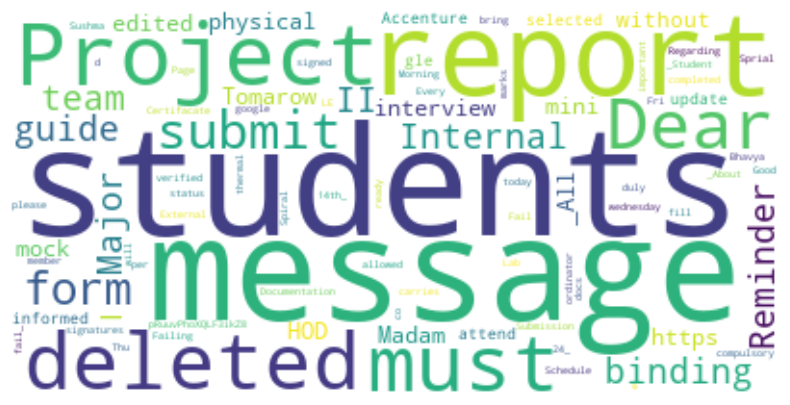

In [249]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Shashank


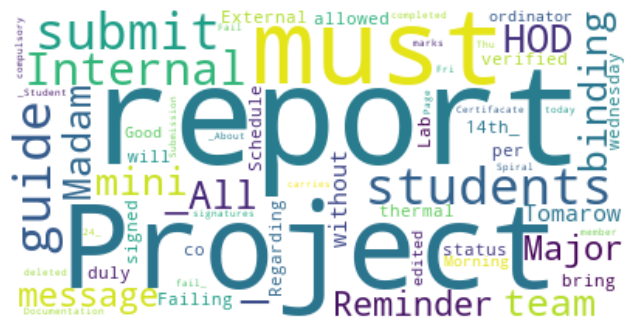


Author name kavitha soppari


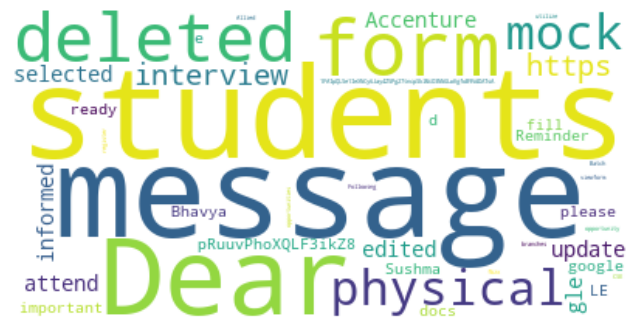


Author name Gopinath Yadav


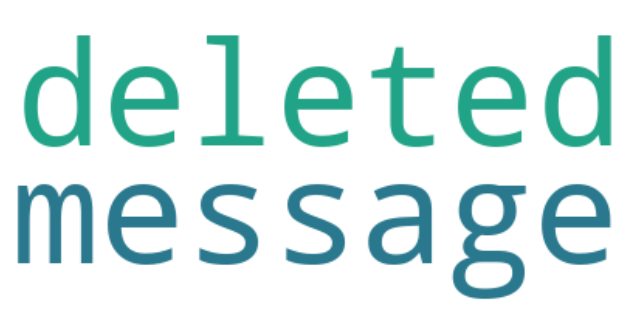

In [252]:
l = ["Shashank","kavitha soppari","Gopinath Yadav"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    
  plt.figure( figsize=(8,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  print()